In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/procurement-kpi-analysis-dataset/Procurement KPI Analysis Dataset.csv


## Title:
Procurement KPI Analysis

## Description:
Dataset capturing key performance indicators (KPIs) to evaluate and optimize procurement processes, including metrics on cost efficiency, supplier performance, and purchase cycle times.

## Import dataset

In [2]:
df = pd.read_csv('/kaggle/input/procurement-kpi-analysis-dataset/Procurement KPI Analysis Dataset.csv')

In [3]:
df.head()

,PO_ID,Supplier,Order_Date,Delivery_Date,Item_Category,Order_Status,Quantity,Unit_Price,Negotiated_Price,Defective_Units,Compliance
0,PO-00001,Alpha_Inc,2023-10-17,2023-10-25,Office Supplies,Cancelled,1176,20.13,17.81,NaN,Yes
1,PO-00002,Delta_Logistics,2022-04-25,2022-05-05,Office Supplies,Delivered,1509,39.32,37.34,235.0,Yes
2,PO-00003,Gamma_Co,2022-01-26,2022-02-15,MRO,Delivered,910,95.51,92.26,41.0,Yes
3,PO-00004,Beta_Supplies,2022-10-09,2022-10-28,Packaging,Delivered,1344,99.85,95.52,112.0,Yes
4,PO-00005,Delta_Logistics,2022-09-08,2022-09-20,Raw Materials,Delivered,1180,64.07,60.53,171.0,No


In [4]:
df.tail()

,PO_ID,Supplier,Order_Date,Delivery_Date,Item_Category,Order_Status,Quantity,Unit_Price,Negotiated_Price,Defective_Units,Compliance
772,PO-00773,Delta_Logistics,2023-02-11,2023-02-20,Electronics,Delivered,1685,43.42,42.24,262.0,Yes
773,PO-00774,Alpha_Inc,2022-07-23,NaN,Office Supplies,Delivered,445,68.94,60.35,7.0,Yes
774,PO-00775,Gamma_Co,2022-03-19,2022-04-07,Raw Materials,Delivered,494,94.82,81.89,29.0,Yes
775,PO-00776,Beta_Supplies,2023-08-30,2023-09-11,MRO,Delivered,1306,21.05,18.27,128.0,Yes
776,PO-00777,Beta_Supplies,2023-12-09,2023-12-11,Office Supplies,Delivered,1988,105.20,93.23,187.0,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PO_ID             777 non-null    object 
 1   Supplier          777 non-null    object 
 2   Order_Date        777 non-null    object 
 3   Delivery_Date     690 non-null    object 
 4   Item_Category     777 non-null    object 
 5   Order_Status      777 non-null    object 
 6   Quantity          777 non-null    int64  
 7   Unit_Price        777 non-null    float64
 8   Negotiated_Price  777 non-null    float64
 9   Defective_Units   641 non-null    float64
 10  Compliance        777 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 66.9+ KB


In [6]:
df.describe()

,Quantity,Unit_Price,Negotiated_Price,Defective_Units
count,777.000000,777.000000,777.000000,641.000000
mean,1094.660232,58.283822,53.660721,74.803432
std,647.844551,28.101315,26.094930,69.187870
min,51.000000,10.840000,9.270000,0.000000
25%,615.000000,33.290000,30.460000,26.000000
50%,1075.000000,58.950000,53.800000,49.000000
75%,1548.000000,83.130000,76.550000,100.000000
max,5000.000000,109.170000,107.390000,321.000000


In [7]:
df.isnull().sum()

PO_ID                 0
Supplier              0
Order_Date            0
Delivery_Date        87
Item_Category         0
Order_Status          0
Quantity              0
Unit_Price            0
Negotiated_Price      0
Defective_Units     136
Compliance            0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.dtypes

PO_ID                object
Supplier             object
Order_Date           object
Delivery_Date        object
Item_Category        object
Order_Status         object
Quantity              int64
Unit_Price          float64
Negotiated_Price    float64
Defective_Units     float64
Compliance           object
dtype: object

In [10]:
df.shape

(777, 11)

In [11]:
df.dtypes

PO_ID                object
Supplier             object
Order_Date           object
Delivery_Date        object
Item_Category        object
Order_Status         object
Quantity              int64
Unit_Price          float64
Negotiated_Price    float64
Defective_Units     float64
Compliance           object
dtype: object

In [12]:
df.columns

Index(['PO_ID', 'Supplier', 'Order_Date', 'Delivery_Date', 'Item_Category',
       'Order_Status', 'Quantity', 'Unit_Price', 'Negotiated_Price',
       'Defective_Units', 'Compliance'],
      dtype='object')

## Data visualizations

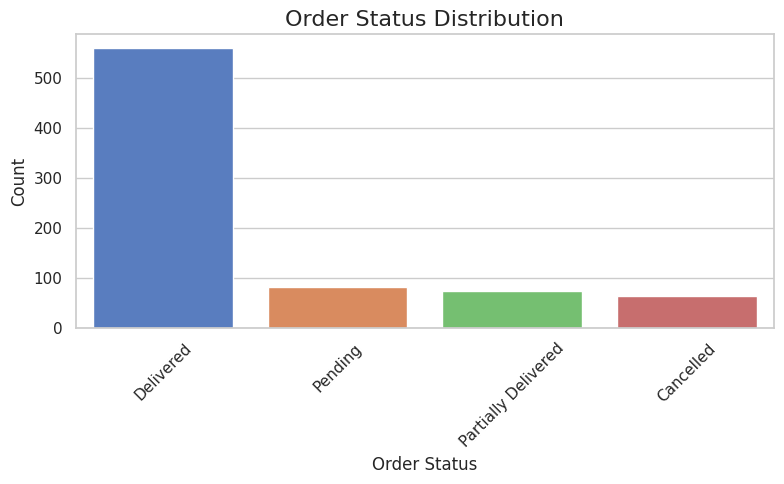

In [13]:
# --- Basic Setup ---
sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Order Status Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Order_Status', order=df['Order_Status'].value_counts().index)
plt.title('Order Status Distribution', fontsize=16)
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


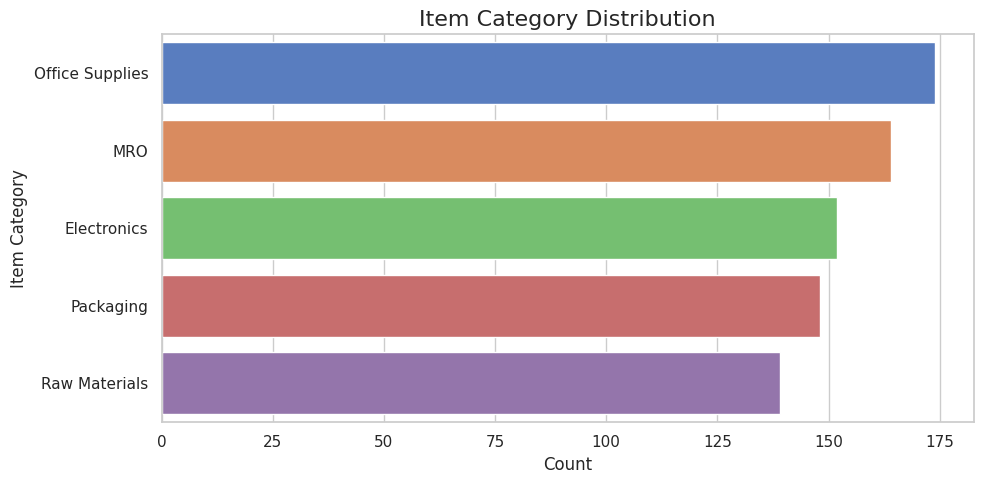

In [14]:
# 2. Item Category Distribution
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='Item_Category', order=df['Item_Category'].value_counts().index)
plt.title('Item Category Distribution', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Item Category')
plt.tight_layout()
plt.show()

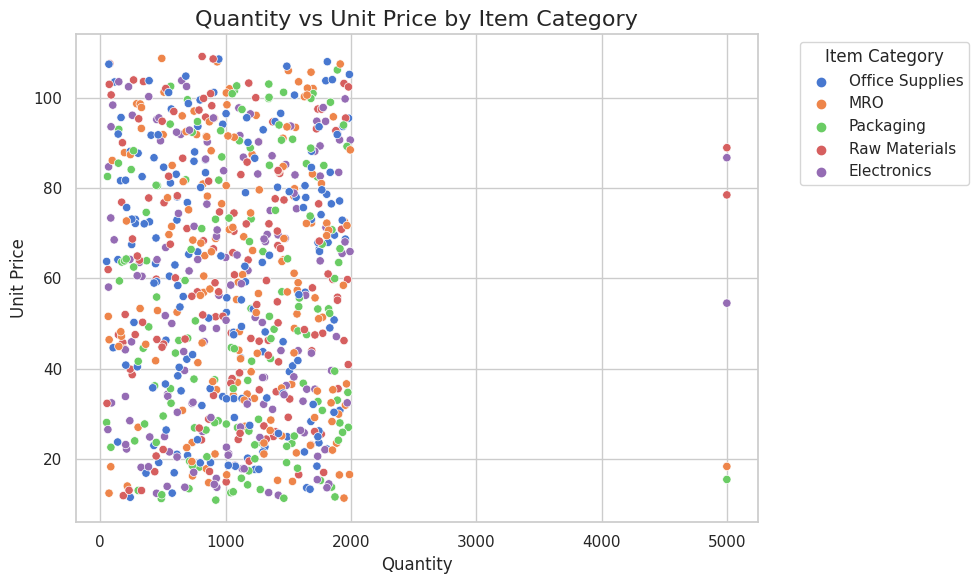

In [15]:
# 3. Quantity vs. Unit Price Scatter Plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Quantity', y='Unit_Price', hue='Item_Category')
plt.title('Quantity vs Unit Price by Item Category', fontsize=16)
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.legend(title='Item Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


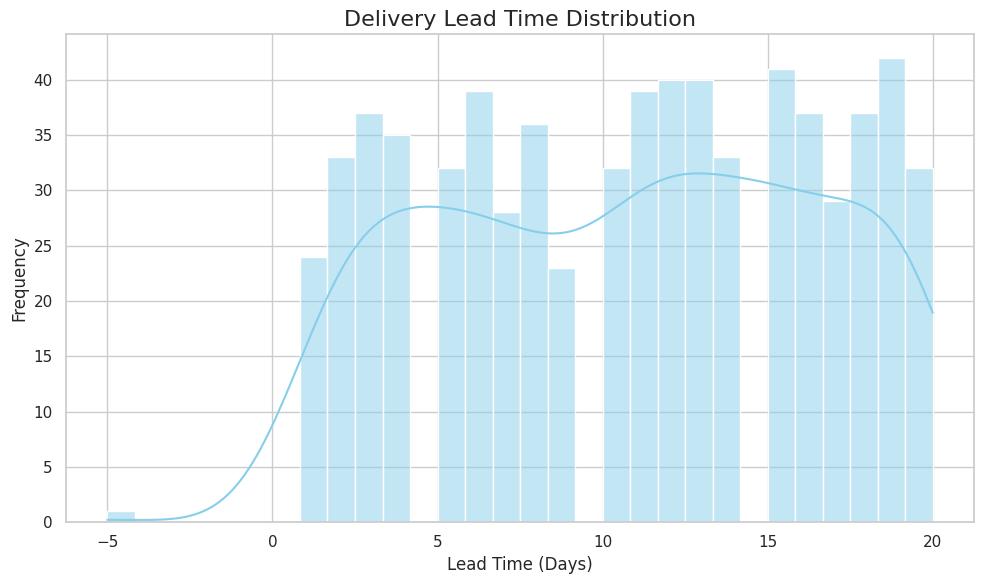

In [16]:
# 4. Delivery Lead Time (Days) Analysis
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Delivery_Date'] = pd.to_datetime(df['Delivery_Date'])
df['Lead_Time_Days'] = (df['Delivery_Date'] - df['Order_Date']).dt.days

plt.figure(figsize=(10,6))
sns.histplot(df['Lead_Time_Days'], bins=30, kde=True, color='skyblue')
plt.title('Delivery Lead Time Distribution', fontsize=16)
plt.xlabel('Lead Time (Days)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

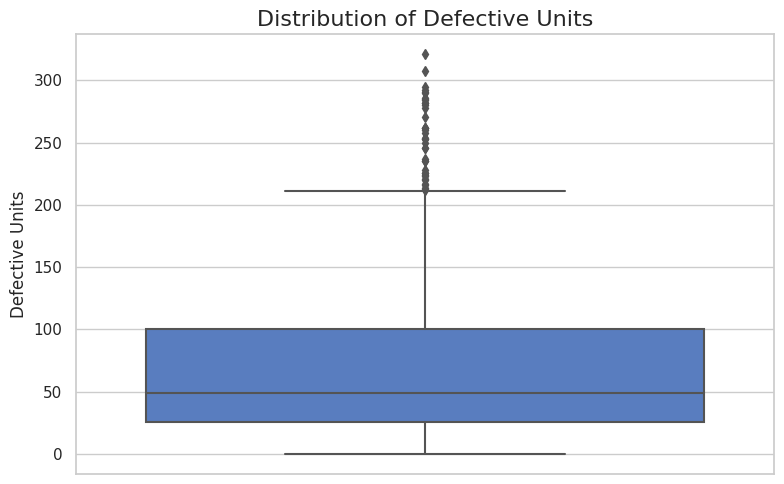

In [17]:
# 5. Defective Units Analysis
plt.figure(figsize=(8,5))
sns.boxplot(data=df, y='Defective_Units')
plt.title('Distribution of Defective Units', fontsize=16)
plt.ylabel('Defective Units')
plt.tight_layout()
plt.show()


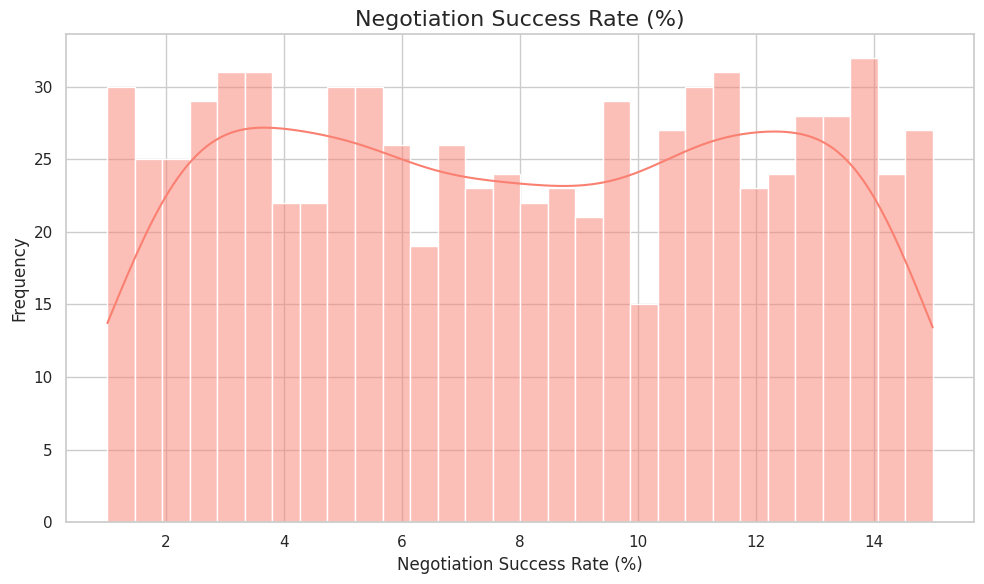

In [18]:
# 6. Negotiated Price vs Unit Price Comparison
df['Negotiation_Success_Rate'] = (df['Unit_Price'] - df['Negotiated_Price']) / df['Unit_Price'] * 100

plt.figure(figsize=(10,6))
sns.histplot(df['Negotiation_Success_Rate'], bins=30, kde=True, color='salmon')
plt.title('Negotiation Success Rate (%)', fontsize=16)
plt.xlabel('Negotiation Success Rate (%)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

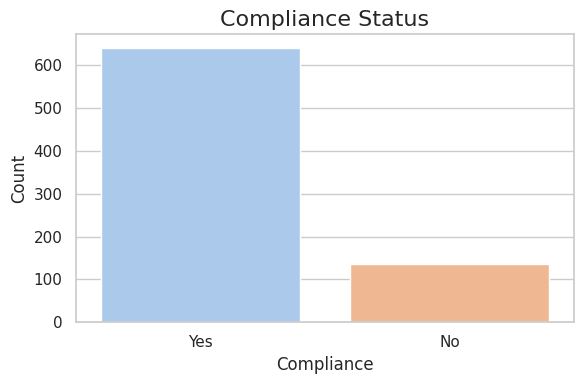

In [19]:
# 7. Compliance Status Count
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Compliance', palette='pastel')
plt.title('Compliance Status', fontsize=16)
plt.xlabel('Compliance')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

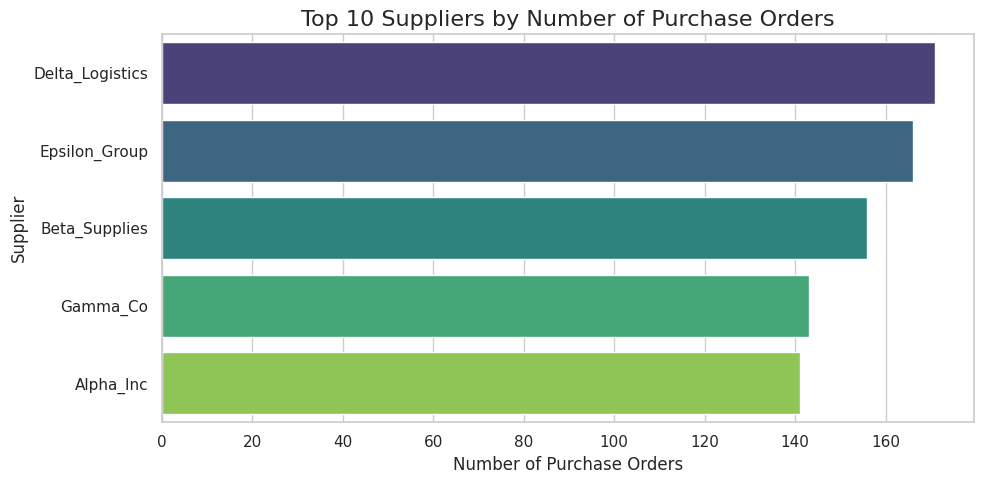

In [20]:
# 8. Top Suppliers by Number of POs
top_suppliers = df['Supplier'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_suppliers.values, y=top_suppliers.index, palette='viridis')
plt.title('Top 10 Suppliers by Number of Purchase Orders', fontsize=16)
plt.xlabel('Number of Purchase Orders')
plt.ylabel('Supplier')
plt.tight_layout()
plt.show()

## Predictive modeling

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [22]:
# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [23]:
# 1. Convert Dates
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Delivery_Date'] = pd.to_datetime(df['Delivery_Date'])

# 2. Feature Engineering: Create 'Lead_Time_Days'
df['Lead_Time_Days'] = (df['Delivery_Date'] - df['Order_Date']).dt.days

# 3. Drop unnecessary columns
df.drop(['PO_ID', 'Order_Date', 'Delivery_Date'], axis=1, inplace=True)

# 4. Fill missing values (if any)
df.fillna(0, inplace=True)

In [24]:
# 5. Label Encoding for categorical columns
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# 6. Features and Target
X = df.drop('Order_Status', axis=1)  # Features
y = df['Order_Status']               # Target (Encoded)

# 7. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.78      0.99      0.87       122
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00        11

    accuracy                           0.78       156
   macro avg       0.20      0.25      0.22       156
weighted avg       0.61      0.78      0.68       156



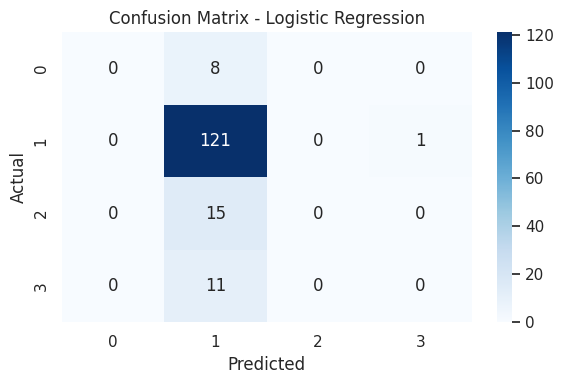


Model: Decision Tree
              precision    recall  f1-score   support

           0       0.08      0.12      0.10         8
           1       0.80      0.69      0.74       122
           2       0.12      0.13      0.13        15
           3       0.18      0.36      0.24        11

    accuracy                           0.58       156
   macro avg       0.30      0.33      0.30       156
weighted avg       0.65      0.58      0.61       156



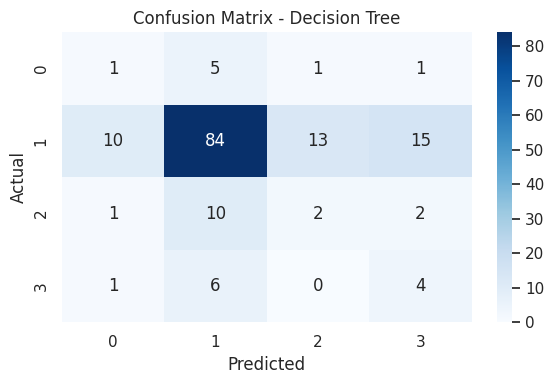


Model: Random Forest
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.79      0.99      0.88       122
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00        11

    accuracy                           0.78       156
   macro avg       0.20      0.25      0.22       156
weighted avg       0.61      0.78      0.69       156



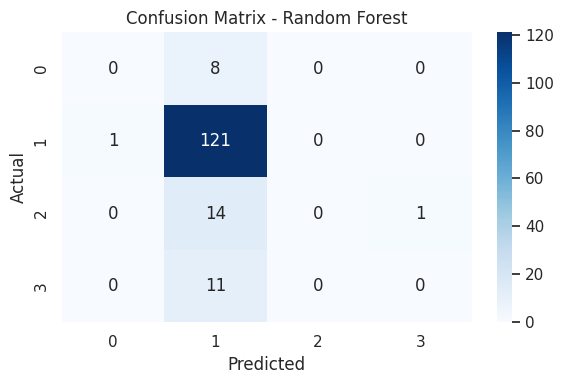


Model: Gradient Boosting
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.80      0.96      0.87       122
           2       0.25      0.07      0.11        15
           3       0.00      0.00      0.00        11

    accuracy                           0.76       156
   macro avg       0.26      0.26      0.24       156
weighted avg       0.65      0.76      0.69       156



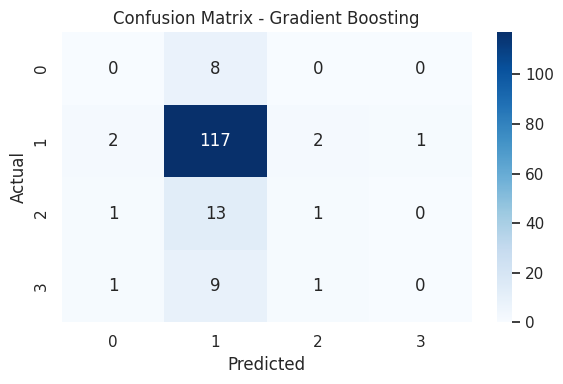


Model: AdaBoost
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.79      0.87      0.82       122
           2       0.18      0.20      0.19        15
           3       0.00      0.00      0.00        11

    accuracy                           0.70       156
   macro avg       0.24      0.27      0.25       156
weighted avg       0.63      0.70      0.66       156



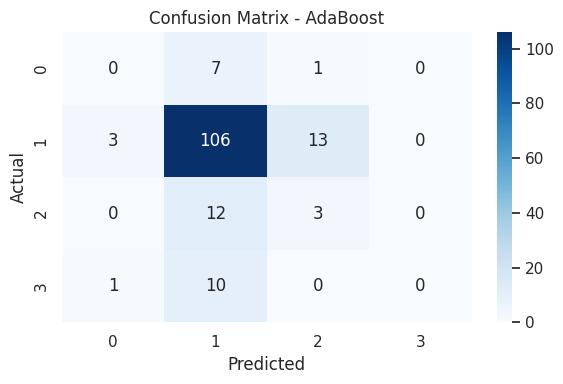


Model: Support Vector Machine
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.78      1.00      0.88       122
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00        11

    accuracy                           0.78       156
   macro avg       0.20      0.25      0.22       156
weighted avg       0.61      0.78      0.69       156



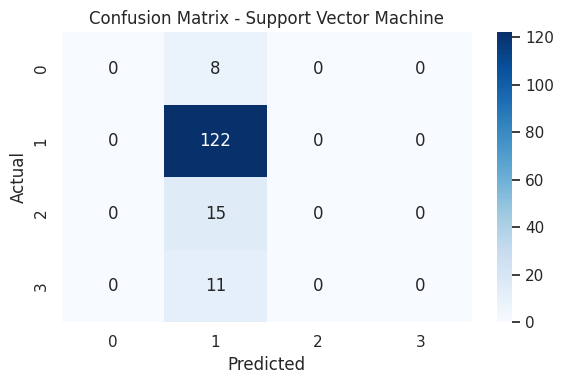


Model: K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.79      0.94      0.86       122
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00        11

    accuracy                           0.74       156
   macro avg       0.20      0.24      0.22       156
weighted avg       0.62      0.74      0.67       156



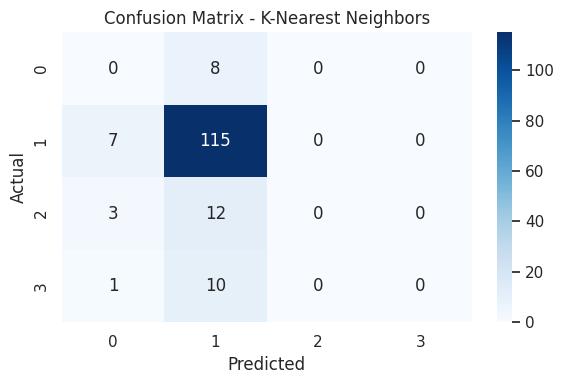


Model: XGBoost
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.80      0.95      0.87       122
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00        11

    accuracy                           0.74       156
   macro avg       0.20      0.24      0.22       156
weighted avg       0.63      0.74      0.68       156



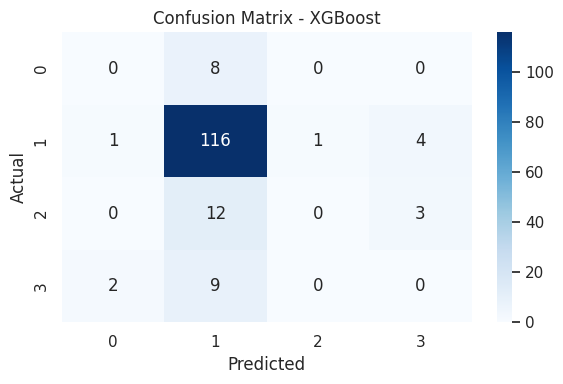

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003177 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 975
[LightGBM] [Info] Number of data points in the train set: 621, number of used features: 9
[LightGBM] [Info] Start training from score -2.423998
[LightGBM] [Info] Start training from score -0.349112
[LightGBM] [Info] Start training from score -2.370888
[LightGBM] [Info] Start training from score -2.182836
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

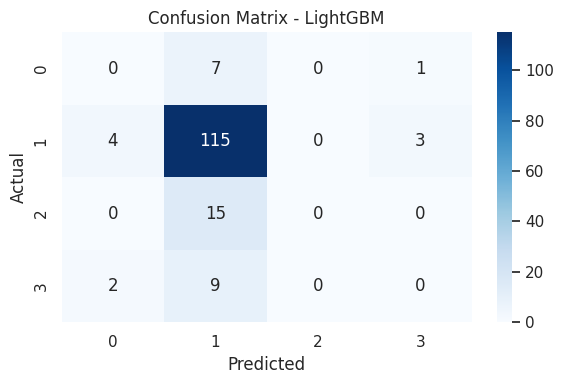

In [25]:
# --- Function for Model Training & Evaluation ---
def train_and_evaluate(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\nModel: {model_name}")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# --- Models to Train ---
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss'),
    "LightGBM": LGBMClassifier()
}

# --- Train and Evaluate All Models ---
for model_name, model in models.items():
    train_and_evaluate(model, model_name)

## Thank you..pls upvote!!!